

# Decision Trees on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Decision Tree](#section4)<br>
    - 4.1 [Introduction of Decision Tree](#section401)<br>
    - 4.2 [Important Terminology related to Decision Trees](#section402)<br>
    - 4.3 [Types of Decision Trees](#section403)<br>
    - 4.4 [Concept of Homogenity](#section404)<br>
    - 4.5 [How does a tree decide where to split?](#section405)<br>
         - 4.5.1 [Gini Index](#GiniIndex)<br>
         - 4.5.2 [Information Gain](#InformationGain)<br>
    - 4.6 [Advantages of using Decision Tree](#section406)<br>
    - 4.7 [Shortcomings of Decision Trees](#section407)<br>
    - 4.8 [Preparing X and y using pandas](#section408)<br>
    - 4.9 [Splitting X and y into training and test datasets.](#section409)<br>
    - 4.10 [Decision Tree in scikit-learn](#section410)<br>
    - 4.11 [Using the Model for Prediction](#section411)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br>
6. [Decision Tree with Gridsearch](#section6)<br>

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description
![image.png](attachment:image.png)

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Gate of embarmkment                                       |

#### Importing packages                                          

In [1]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [3]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/amity1415/DS/main/EKeeda/Rawdata/titanic_raw_data.csv")     # Importing training dataset using pd.read_csv

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [6]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [7]:
median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age, inplace = True)

In [8]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [9]:
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

- Creating a new feature named __FamilySize__.

In [10]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [11]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [12]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [13]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


- __Dummification__ of __GenderClass__ & __Embarked__.

In [14]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

- __Dropping__ columns __'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'__ 

In [15]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch', 'PassengerId'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1.0, 'Pair Plot')

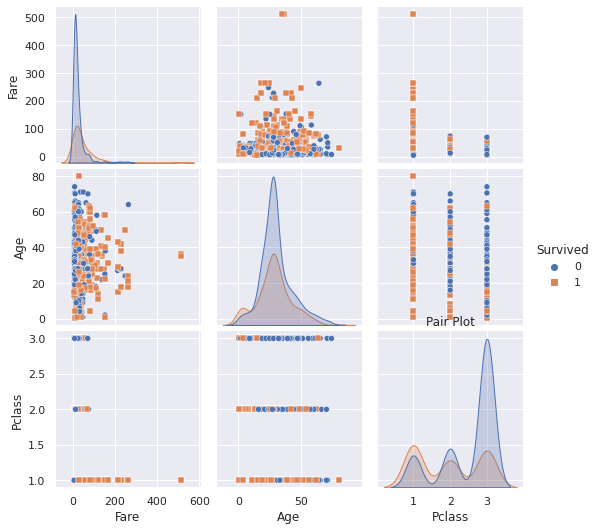

In [16]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

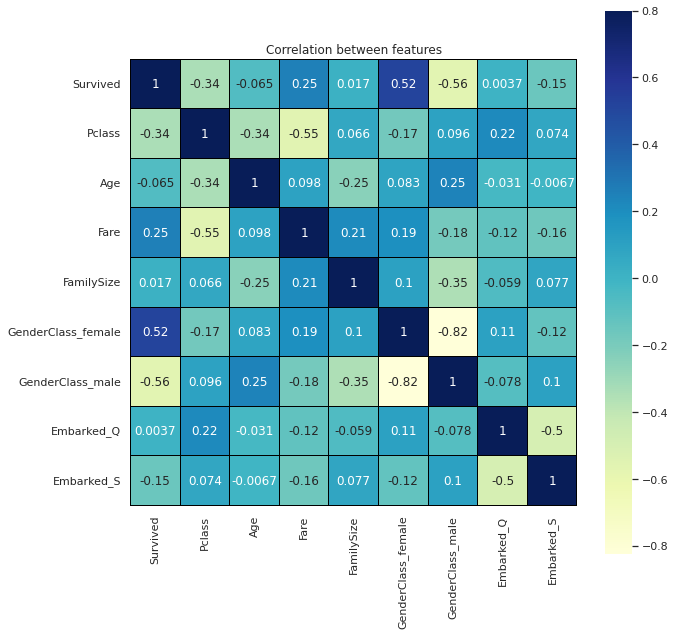

In [17]:
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [18]:
titanic = titanic.drop(['GenderClass_female'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


Text(0.5, 1.0, 'Correlation between features')

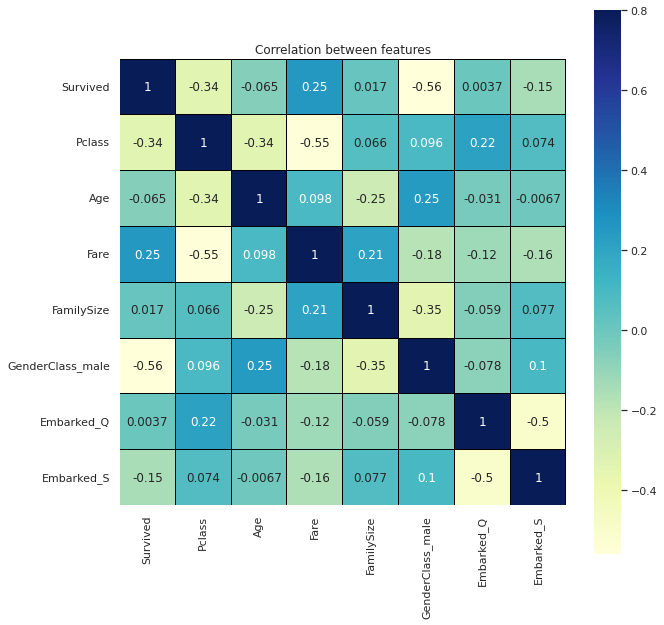

In [19]:
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id = section4></a>

## 4. Decision Tree

<a id = section401></a>

### 4.1 Introduction of Decision Tree

A __decision tree__ is one of most frequently and widely used supervised machine learning algorithms that can perform both __regression and classification tasks.__<br/>
The intuition behind the decision tree algorithm is simple, yet also very powerful.<br/>

Everyday we need to make numerous __decisions__, many smalls and a few big.<br>
So, Whenever you are in a dilemna, if you'll keenly observe your thinking process. You'll find that, you are unconsciously using __decision tree approcah__ or you can also say that decision tree approach is based on our thinking process. <br/>
![image.png](attachment:image.png)
- A decision tree __split the data into multiple sets__.Then each of these sets is further split into subsets to arrive at a __decision__.<br/>
- It is a very natural decision making process asking a series of question in a nested if then else statement.
- On each node you ask a question to further split the data held by the node. <br/>




So, lets understand what is a decision tree with a help of a real life example.<br>


Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:

1. __Is this person a close friend or just an acquaintance?__
 - If the person is just an acquaintance, then decline the request;
 - if the person is friend, then move to next step.

2. __Is the person asking for the car for the first time?__
 - If so, lend them the car,
 - otherwise move to next step.

3. __Was the car damaged last time they returned the car?__
 - If yes, decline the request; 
 - if no, lend them the car.<br/>
 
The decision tree for the aforementioned scenario looks like this:
![image.png](attachment:image.png)

The structure of decision tree resembles an __upside down tree__, with its roots at the top and braches are at the bottom. The end of the branch that doesnt split any more is the decision or leaf.
![image.png](attachment:image.png)

Now, lets see what is __Decision tree algorithm.__<br/> 
Decision tree is a type of __supervised learning algorithm__ (having a pre-defined target variable) that is mostly used in classification problems.
- It works for both __categorical and continuous__ input and output variables.
- In this technique, we __split the population__ or sample into two or more homogeneous sets (or sub-populations) based on most __significant splitter / differentiator__ in input variables.

![image.png](attachment:image.png)

<a id = section402></a>

### 4.2 Important Terminology related to Decision Trees

Let’s look at the basic terminology used with Decision trees:

- __Root Node__: <br/>It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- __Splitting__: <br/>It is a process of dividing a node into two or more sub-nodes.
- __Decision Node__:<br/> When a sub-node splits into further sub-nodes, then it is called decision node.
- __Leaf/ Terminal Node__:<br/> Nodes do not split is called Leaf or Terminal node.
![image.png](attachment:image.png)

- __Pruning__:<br/> When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
- __Branch / Sub-Tree__:<br/> A sub section of entire tree is called branch or sub-tree.
- __Parent and Child Node__:<br/> A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

<a id = section403></a>

### 4.3 Types of Decision Trees

Types of decision tree is based on the __type of target variable__ we have. It can be of two types:

- __Categorical Variable Decision Tree__: <br/>
 - Decision Tree which has __categorical target variable__ then it called as categorical variable decision tree.
- __Continuous Variable Decision Tree__:<br/>
 - Decision Tree has __continuous target variable__ then it is called as Continuous Variable Decision Tree.<br/>
 
__Example__:<br/>
- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (__Yes/ No__).<br/> For this we are predicting values for categorical variable. So, the decision tree approach that will be used is __Categorical Variable Decision Tree.__ <br/>
- Now, suppose insurance company does not have income details for all customers. But, we know that this is an important variable, then we can build a decision tree to predict customer income based on occupation, product and various other variables.<br/> In this case, we are predicting values for continuous variable. So , This approach is called __Continuous Variable Decision Tree__.

<a id = section404></a>

### 4.4 Concept of Homogenity

__Homogenous__ populations are __alike__ and __heterogeneous__ populations are __unlike__.<br/>
- A heterogenous population is one where individuals are __not similar__ to one another.<br/>
- For example, you could have a heterogenous population in terms of humans that have migrated from different regions of the world and currently live together. That population would likely be heterogenous in regards to height, hair texture, disease immunity, and other traits because of the varied background and genetics.

![image.png](attachment:image.png)

__Note__: In real world you would never get this level of homogeniety. So out of the hetrogenous options you need to select the one having maximum homoginiety. To select the feature which provide maximum homoginety we use __gini & entropy__ techniques.

What Decision tree construction algorithm will try to do is to __create a split in such a way that the homogeneity of different pieces must be as high as possible.__

__Example__

Let’s say we have a sample of __30 students__ with three variables:
1. Gender (Boy/ Girl)
2. Class (IX/ X) and,
3. Height (5 to 6 ft).<br/>

15 out of these 30 play cricket in leisure time. Now, I want to __create a model to predict who will play cricket during leisure period__? In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three.

This is where decision tree helps, it will segregate the students based on all values of three variables and identify the variable, which creates the best homogeneous sets of students (which are heterogeneous to each other). In the snapshot below, you can see that variable __Gender__ is able to identify best homogeneous sets compared to the other two variables.
![image.png](attachment:image.png) 

As mentioned above, decision tree identifies the most significant variable and it’s value that gives best homogeneous sets of population. Now the question which arises is, how does it identify the variable and the split? To do this, decision tree uses various algorithms, which we will shall discuss in the following section.

<a id = section405></a>

### 4.5 How does a tree decide where to split?
The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on type of target variables. Let’s look at the most commonly used algorithms in decision tree:

 

<a id = GiniIndex></a>

#### 4.5.1 Gini Index
Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

- It works with categorical target variable “Success” or “Failure”.
- It performs only Binary splits
- Higher the value of Gini higher the homogeneity.
- CART (Classification and Regression Tree) uses Gini method to create binary splits.

__Steps to Calculate Gini for a split__

1. Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (1 `-` p<sup>2</sup> `-` q<sup>2</sup>).
2. Calculate Gini for split using weighted Gini score of each node of that split


__Example__: 
– Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.
![image.png](attachment:image.png)


__Gini for Root node__: 
 - 1 `-` (0.5 `*` 0.5) `-` (0.5 `*` 0.5) = 0.50
 
__Split on Gender__:

1. Gini for sub-node __Female__
  - 1 `-` (0.2 `*` 0.2) `-` (0.8 `*` 0.8) = 0.32
  
  
2. Gini for sub-node __Male__
  - 1 `-` (0.65 `*` 0.65) `-` (0.35 `*` 0.35) = 0.45
  
  
3. Weighted Gini for Split __Gender__ 
  -  (10/30) `*` 0.32 `+` (20/30) `*` 0.45 = 0.41
  

__Split on Class__ : 

1. Gini for sub-node __Class IX__ =
  - 1 `-` (0.43 `*` 0.43) `-` (0.57 `*` 0.57) = 0.49
  
  
2. Gini for sub-node __Class X__ =
  - 1 `-` (0.56 `*` 0.56) `-` (0.44 `*` 0.44) = 0.49
  
  
3. Calculate weighted Gini for Split __Class__  
  - (14/30) `*` 0.51 `+` (16/30) `*` 0.51 = 0.49
  
  


Above, you can see that:
__Gini score__ for Split on __Gender__ __`<`__ Gini score for Split on __Class__.<br/>
Also, __Gini score__ for __Gender__ __`<`__ Gini score for __root node__.<br/>
Hence, the __node split will take place on Gender.__

<a id = InformationGain></a>

#### 4.5.2 Information Gain:
Look at the image below and think which node can be described easily.<br/>
I am sure, your answer is C because it requires less information as all values are similar. On the other hand, B requires more information to describe it and A requires the maximum information.<br/> In other words, we can say that __C is a Pure node, B is less Impure and A is more impure.__
![image.png](attachment:image.png)

Now, we can build a conclusion that:
- less impure node requires less information to describe it.
- more impure node requires more information. 

Information theory is a measure to define this degree of disorganization in a system by a parameter known as __Entropy__.
- If the sample is completely __homogeneous__, then the __entropy is zero__ and<br/>
- If the sample is an __equally divided__ (50% – 50%), it has __entropy of one__.



### Entropy can be calculated using formula:
![image.png](attachment:image.png)
where,<br/>
__p__ & __q__ is __probability of success and failure__ respectively in that node.<br/> 
- __Information Gain = 1 - Entropy__.<br/>
- The model will choose the split which facilitates __maximum information gain__, which in turn means __minimum Entropy__.<br/>
- So, it chooses the split which has __lowest entropy__ compared to parent node and other splits.
- __The lesser the entropy, the better it is.__

__Steps to calculate entropy for a split__:

1. Calculate entropy of parent node
2. Calculate entropy of each individual node of split and 
3. Calculate weighted average of all sub-nodes available in split.
4. Caluclate the Information Gain in various split options w.r.t parent node
5. Choose the split with highest Information Gain.


Example: Let’s use this method to identify best split for student example.

 - __Entropy for parent node__
    - `-` (15/30) log2 (15/30) `–` (15/30) log2 (15/30) = 1.<br/>
      Here 1 shows that it is a impure node.
      
      
- __Entropy for Female node__ 
    - `-` (2/10) log2 (2/10) `–` (8/10) log2 (8/10) = 0.72 
    
    
- __Entropy for male node__
    - `-` (13/20) log2 (13/20) `–` (7/20) log2 (7/20) = 0.93
    
    
- __Entropy for split Gender__ = Weighted entropy of sub`-`nodes 
   - (10/30) `*` 0.72 + (20/30) `*` 0.93 = 0.86
   
-------------------------------------------------------------------------------------
- __Information Gain for split Gender__ = Entropy of Parent Node `-` Weighted entropy for Split Gender 
   - 1 `-` 0.86 = 0.14
-------------------------------------------------------------------------------------
   
   
   
- __Entropy for Class IX node__,
   - `-`(6/14) log2 (6/14) `–` (8/14) log2 (8/14) = 0.99
   
   
- __Entropy for Class X node__,
   - `-`(9/16) log2 (9/16) `–` (7/16) log2 (7/16) = 0.99.
   
   
- __Entropy for split Class__,
   -  (14/30) `*` 0.99 `+` (16/30) `*` 0.99 = 0.99
   

-------------------------------------------------------------------------------------
- __Information Gain for split Class__ = Entropy of Parent Node `-` Weighted entropy for Split Class 
   - 1 `-` 0.99 = 0.01
-------------------------------------------------------------------------------------

Observe that:<br/>
__Information Gain for Split on Gender > Information Gain for Split on Class__,<br/> So, __the tree will split on Gender.__<br/>


<a id = section406></a>

### 4.6  Advantages of using Decision Tree

- __Easy to Understand__: 
 - Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. 
 - Its graphical representation is very intuitive and users can easily relate their hypothesis.
- __Less data cleaning required__: 
 - It requires less data cleaning compared to some other modeling techniques.
 - It is not influenced by outliers and missing values to a fair degree.
- __Data type is not a constraint__: 
 - It can handle both numerical and categorical variables.
- __Non Parametric Method__: 
 - Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

<a id = section407></a>

### 4.7 Shortcomings of Decision Trees
- __Over fitting__:
 - Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).
- __Not a great contributor for regression__:
 - While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

<a id = section408></a>

### 4.8 Preparing X and y using pandas

In [20]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,Pclass,Age,Fare,FamilySize,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,1,0,1
1,1,38.0,71.2833,2,0,0,0
2,3,26.0,7.9250,1,0,0,1
3,1,35.0,53.1000,2,0,0,1
4,3,35.0,8.0500,1,1,0,1


In [21]:
y = titanic.Survived 

<a id=section409></a>

### 4.9 Splitting X and y into training and test datasets.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [23]:
print(X_train.shape)
print(y_train.shape)

(712, 7)
(712,)


In [24]:
#scaling
#scaling on X

from sklearn.preprocessing import StandardScaler #mean = 0 and SD = 1 
sc = StandardScaler()
sc.fit(X_train)                                                                                   # fit the data to Standardscaler

X_tests = sc.transform(X_test) 
X_trains = sc.transform(X_train)    # transform the data

# print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
# print(pd.DataFrame(X_trains, columns=X_train.columns).head()) 

<a id=section410></a>

## 4.10 Decision Tree in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn import tree
    model = tree.DecisionTreeClassifier(criterion='gini')
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion='gini') #entrophy
model.fit(X_trains, y_train)


DecisionTreeClassifier()

In [26]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier( criterion='gini', max_depth=7,
#                        max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, presort=False,
#                        random_state=None, splitter='best')
# model.fit(X_trains, y_train)

#random state is a seed to start finding something randomly

- __Plotting our model of decision tree__

In [27]:
#import sys
#! pip install graphviz
#! pip install pydotplus
#! pip install Ipython

# !{sys.executable} -m pip install pydot
#!pip install pydot

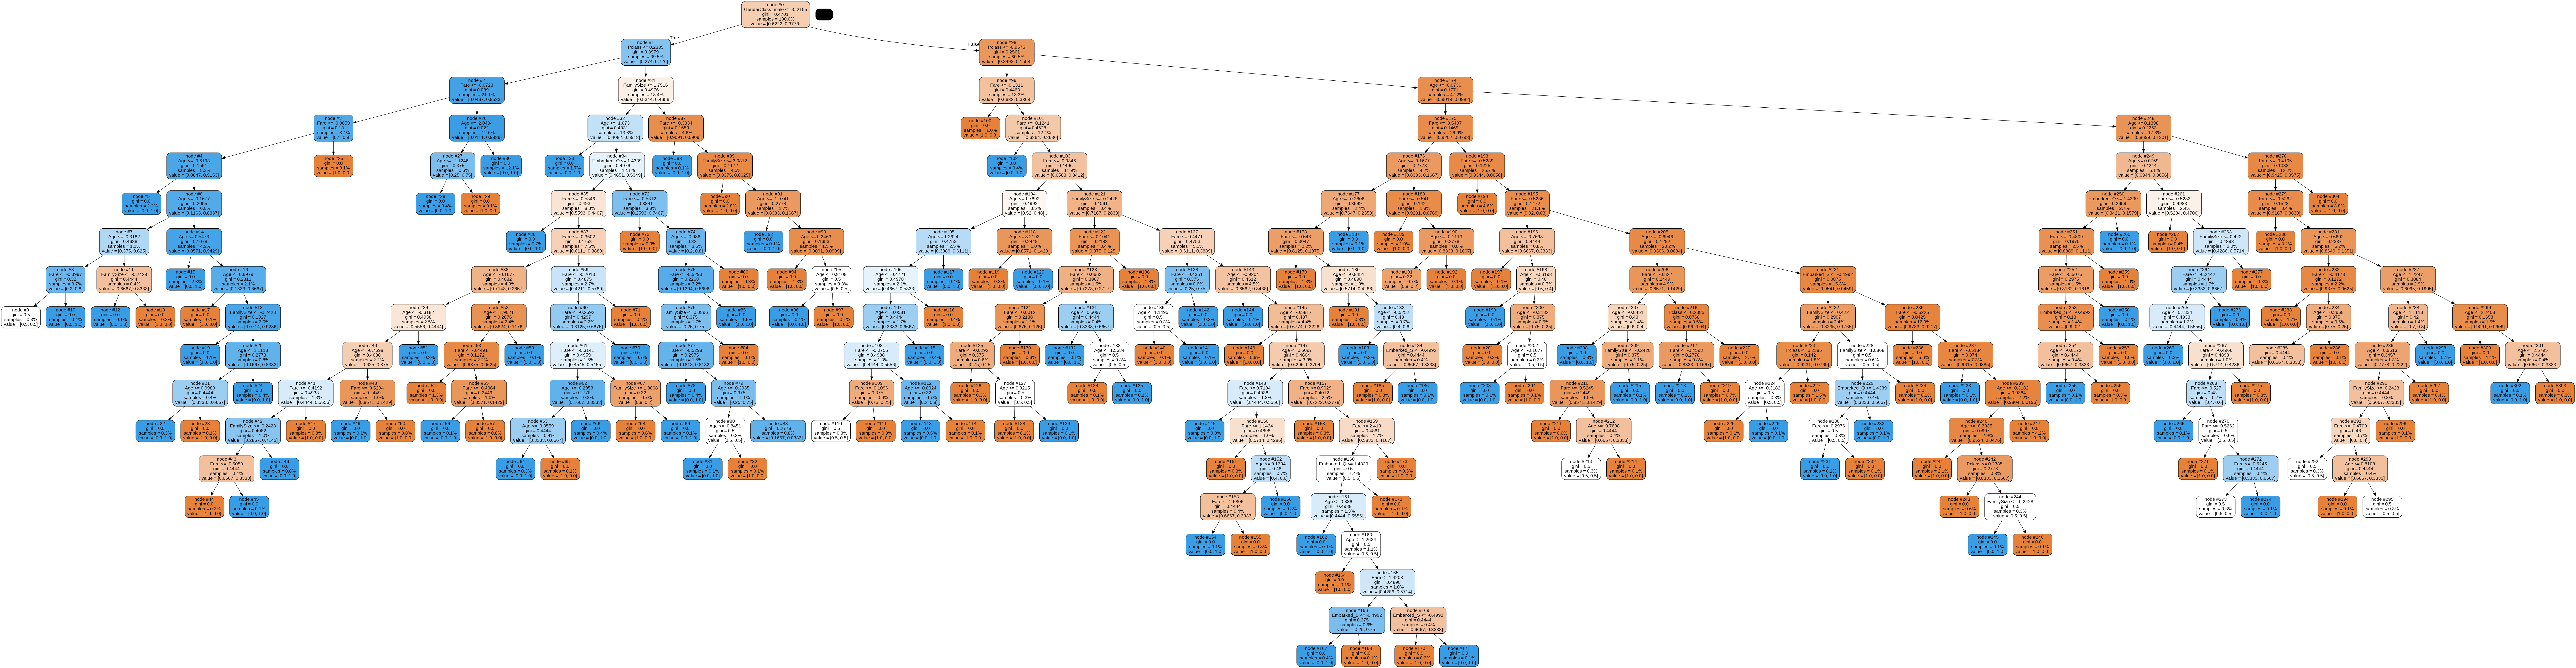

In [28]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

export_graphviz(model, 
                out_file='decision_tree.dot',
                feature_names= X.columns, 
                rounded=True, 
                precision=4, 
                node_ids=True, 
                proportion=True,
                filled=True)

(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')

Image(filename='decision_tree.png') 

<a id=section411></a>

### 4.11 Using the Model for Prediction

In [29]:
y_pred_train = model.predict(X_trains)  

In [30]:
y_pred_test = model.predict(X_tests)                                                           # make predictions on the testing set

- Now lets see some model evaluation techniques.

<a id = section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id=section501></a>

### 5.1 Model Evaluation using __accuracy_score__

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

# even though the DT approach is a weak approach stand alone. 
# But, it is very easy to combine to form a group for pred.

Accuracy score for test data is: 0.7821229050279329


In [32]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))

# even though the DT approach is a weak approach stand alone. 
# But, it is very easy to combine to form a group for pred.

Accuracy score for train data is: 0.9873595505617978


In [33]:
from sklearn.metrics import precision_score
print('Precision score for test data is:', precision_score(y_test,y_pred_test))

# even though the DT approach is a weak approach stand alone. 
# But, it is very easy to combine to form a group for pred.

Precision score for test data is: 0.7575757575757576


In [34]:
from sklearn.metrics import precision_score
print('Precision score for train data is:', precision_score(y_train,y_pred_train))

# even though the DT approach is a weak approach stand alone. 
# But, it is very easy to combine to form a group for pred.

Precision score for train data is: 0.9961832061068703


In [35]:
from sklearn.metrics import recall_score
print('Recall score for train data is:', recall_score(y_train,y_pred_train))

# even though the DT approach is a weak approach stand alone. 
# But, it is very easy to combine to form a group for pred.

Recall score for train data is: 0.9702602230483272


In [36]:
from sklearn.metrics import recall_score
print('Recall score for test data is:', recall_score(y_test,y_pred_test))

# even though the DT approach is a weak approach stand alone. 
# But, it is very easy to combine to form a group for pred.

Recall score for test data is: 0.684931506849315


<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
![image.png](attachment:image.png)

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  90                  16
Actual Survived              23                  50


This means 88 + 51 = __139 correct predictions__ & 22 + 18 = __40 false predictions__.

<a id = section6></a>

## 6. Decision Tree with Gridsearch
<br/>
Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.
To know more about the different parameters in decision tree classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] , 'min_samples_split' : range(6,20), 
                       'min_samples_leaf':range(3,8) }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_ #Best Estimator

In [ ]:
grid_search.best_score_   #Best Score


In [ ]:
grid_search.best_params_  #Best Params

- Using the model for __prediction__

In [48]:
y_pred_test1 = grid_search.predict(X_test)

- __Model Evaluation__ using __accuracy_score__

In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.7821229050279329


- __Model Evaluation__ using __confusion matrix__

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

You can see 95 + 49 = __144 correct predictions__ & 24 + 11 = __35 false predictions__.

__Observations:__

- __With gridsearch__ *accuracy_score* __increased__ from __0.765 to 0.804__ and the __number of correct predictions increased from 139 to 144__ and number of false predictions __decreased__ from __40 to 35__. 

In [69]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, min_samples_split=12, 
                       min_samples_leaf=6, min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=None, 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

model.fit(X_trains, y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=12)

In [70]:
y_pred_Test2 = model.predict(X_tests)

In [71]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_Test2))

Accuracy score for test data is: 0.7597765363128491
